<a href="https://colab.research.google.com/github/dharalakshmi/NNDL/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import zipfile
import os

# Upload the dataset
uploaded = files.upload()

# Unzip the uploaded file
zip_path = next(iter(uploaded))  # Gets uploaded file name
extract_dir = "neonatal_jaundice_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List directories
os.listdir(extract_dir)


Saving Neonatal Jaundice Assessment A Dataset of Forehead and Sternum Images for Bilirubin Estimation (1).zip to Neonatal Jaundice Assessment A Dataset of Forehead and Sternum Images for Bilirubin Estimation (1).zip


['Neonatal Jaundice Assessment A Dataset of Forehead and Sternum Images for Bilirubin Estimation']

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import img_to_array
from sklearn.model_selection import train_test_split

# Define paths
forehead_path = os.path.join(extract_dir, 'Neonatal Jaundice Assessment A Dataset of Forehead and Sternum Images for Bilirubin Estimation', 'Forehead')
sternum_path = os.path.join(extract_dir, 'Neonatal Jaundice Assessment A Dataset of Forehead and Sternum Images for Bilirubin Estimation', 'Sternum')

# Dummy bilirubin values for demo
# Replace this with actual bilirubin values if available
image_ids = sorted(os.listdir(forehead_path))
bilirubin_levels = np.linspace(5, 15, len(image_ids))  # Dummy values

# Load images
X_data = []
for img_id in image_ids:
    img = cv2.imread(os.path.join(forehead_path, img_id))  # or sternum_path
    img = cv2.resize(img, (128, 128))
    img = img_to_array(img) / 255.0
    X_data.append(img)

X_data = np.array(X_data)
y_data = np.array(bilirubin_levels)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1)  # Regression output
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

# Train model
model.fit(X_train, y_train, epochs=10, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 654ms/step - loss: 120.6480 - mae: 9.3765 - val_loss: 55.9324 - val_mae: 7.0223
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 606ms/step - loss: 32.6068 - mae: 4.8541 - val_loss: 13.4251 - val_mae: 3.0132
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 940ms/step - loss: 15.1998 - mae: 3.3019 - val_loss: 13.3732 - val_mae: 3.0212
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 593ms/step - loss: 11.9073 - mae: 2.8674 - val_loss: 7.6590 - val_mae: 2.3571
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 596ms/step - loss: 10.5987 - mae: 2.7196 - val_loss: 7.4829 - val_mae: 2.0663
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 853ms/step - loss: 8.4251 - mae: 2.5383 - val_loss: 6.6993 - val_mae: 2.1085
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 586ms/step - loss: 8.6958 - mae: 2.5791 - val_loss: 9.2196 - val_mae: 2.3325
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 10.2856 - mae: 2.8089 - val_loss: 6.6688 - val_mae: 2.1615
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 597ms/step - loss: 8.5862 

In [5]:
model.fit(X_train, y_train, epochs=10, validation_split=0.1)


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 595ms/step - loss: 8.4307 - mae: 2.4794 - val_loss: 6.7991 - val_mae: 2.1863
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 837ms/step - loss: 8.8643 - mae: 2.6520 - val_loss: 7.7291 - val_mae: 2.1075
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 590ms/step - loss: 8.8273 - mae: 2.6010 - val_loss: 6.7360 - val_mae: 2.0791
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 588ms/step - loss: 8.5790 - mae: 2.5559 - val_loss: 6.7371 - val_mae: 2.0789
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 833ms/step - loss: 8.3055 - mae: 2.5178 - val_loss: 7.2656 - val_mae: 2.0306
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 584ms/step - loss: 7.9168 - mae: 2.4656 - val_loss: 7.0865 - val_mae: 2.2861
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 640ms/step - loss: 8.7997 - mae: 2.4680 - val_loss: 7.8548 - val_mae: 2.1180
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 834ms/step - loss: 8.7402 - mae: 2.5658 - val_loss: 6.8549 - val_mae: 2.0592
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 848ms/step - loss: 7.4085 - mae:

In [7]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

input_layer = Input(shape=(128, 128, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)  # <- feature vector layer
output = Dense(1)(x)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

# Train model
model.fit(X_train, y_train, epochs=10, validation_split=0.1)

# Extract features from Dense(128)
feature_extractor = Model(inputs=model.input, outputs=model.get_layer(index=-2).output)
features_train = feature_extractor.predict(X_train)
features_test = feature_extractor.predict(X_test)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 916ms/step - loss: 58.0359 - mae: 6.4695 - val_loss: 19.7682 - val_mae: 3.8210
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 624ms/step - loss: 14.6945 - mae: 3.1684 - val_loss: 6.4872 - val_mae: 2.1041
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 670ms/step - loss: 10.6836 - mae: 2.7755 - val_loss: 6.5534 - val_mae: 2.0946
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 604ms/step - loss: 9.9765 - mae: 2.6962 - val_loss: 7.5689 - val_mae: 2.0663
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 790ms/step - loss: 8.9370 - mae: 2.5874 - val_loss: 6.4506 - val_mae: 2.1206
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 608ms/step - loss: 9.6899 - mae: 2.6560 - val_loss: 8.4069 - val_mae: 2.1928
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 592ms/step - loss: 10.0394 - mae: 2.7020 - val_loss: 6.4829 - val_mae: 2.1115
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 845ms/step - loss: 8.5771 - mae: 2.5539 - val_loss: 6.7438 - val_mae: 2.0765
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 592ms/step - loss: 8.2186 - 

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

regressor = RandomForestRegressor()
regressor.fit(features_train, y_train)

y_pred = regressor.predict(features_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 13.213564205093801
R2 Score: -0.3600880229687735


In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(features_train, y_train)
y_pred = reg.predict(features_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 15.757437234377742
R2 Score: -0.6219319271099895


In [11]:
from sklearn.linear_model import Lasso
reg = Lasso(alpha=0.1)
reg.fit(features_train, y_train)
y_pred = reg.predict(features_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 9.72896310035303
R2 Score: -0.0014138489291404266


In [12]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(features_train, y_train)
y_pred = reg.predict(features_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 13.557783407480642
R2 Score: -0.3955189186132455


In [13]:
from sklearn.svm import SVR
reg = SVR(kernel='rbf')
reg.fit(features_train, y_train)
y_pred = reg.predict(features_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 9.809517389051878
R2 Score: -0.009705398548722766


In [14]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(features_train, y_train)
y_pred = reg.predict(features_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 19.013781983381588
R2 Score: -0.9571114004931096


In [15]:
from sklearn.ensemble import AdaBoostRegressor
reg = AdaBoostRegressor(n_estimators=100)
reg.fit(features_train, y_train)
y_pred = reg.predict(features_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 10.472384532880563
R2 Score: -0.0779351092571603


In [16]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(n_estimators=100)
reg.fit(features_train, y_train)
y_pred = reg.predict(features_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 15.057451719203899
R2 Score: -0.5498815778883492


In [17]:
!pip install xgboost  # Run once in Colab

from xgboost import XGBRegressor
reg = XGBRegressor(n_estimators=100)
reg.fit(features_train, y_train)
y_pred = reg.predict(features_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 14.256408544771256
R2 Score: -0.46742924250659623


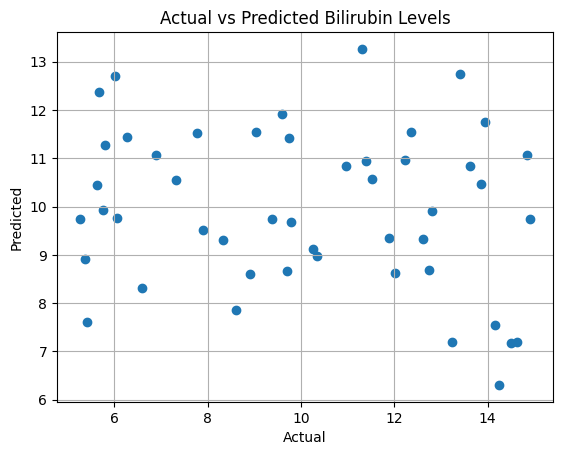

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Bilirubin Levels")
plt.grid(True)
plt.show()
